<a href="https://colab.research.google.com/github/lesarmiento37/coder-proyecto/blob/main/Documento_Ejecutivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelo  de Riesgo Crediticio**

**Intergantes=** Carlos Sarmiento, Rodolfo Sotelo

**Fecha de entrega=** 23/05/2022

## **Tabla de Contenido**


*   Resumen Ejecutivo
*   Modelo de Machine Learning (Jupiter Notebook)



**Descripcion del caso**

Usaremos un conjunto de datos disponible en Kaggle que se relaciona con préstamos de consumo emitidos por Lending Club, un prestamista P2P de EE. UU. Los datos sin procesar incluyen información sobre más de 450 000 préstamos de consumo emitidos entre 2007 y 2014 con casi 75 características, incluido el estado actual del préstamo y varios atributos relacionados con los prestatarios y su comportamiento de pago.


## **Objetivo**
Se realizara  un modelo de riesgo crediticio basado en datos en Python para predecir las probabilidades de incumplimiento. 



## **Descripcion de los datos**



La informacion la hemos extraido del siguiente **Kaggle**:>>>https://towardsdatascience.com/how-to-develop-a-credit-risk-model-and-scorecard-91335fc01f03


El data set utilizado para la elaboracion del modelo de Riesgo Crediticio se encuentra en el siguiente **enlace**>>>> https://drive.google.com/file/d/1uW5U4ogQp17nFMBAhPr8iiaJBZdOnetM/view?usp=sharing

La explicacion de las 75 variables se encuentra en el siguiente **diccionario**:

https://docs.google.com/spreadsheets/d/1N05RNr2ajsTg9xXxebE6PPd2uzpEAzAF/edit?usp=sharing&ouid=106736825120722139781&rtpof=true&sd=true


a los fines practicos solamente  se han traducido  las variables relevantes.


La **resolucion final del Kaggle original** se encuentra en el siguienbte enlace:
https://colab.research.google.com/github/finlytics-hub/credit_risk_model/blob/master/Credit_Risk_Model_and_Credit_Scorecard.ipynb

se ha utilizado  este modelo como guia, sin embargo , el desarrollo del modelo de riesgo crediticio se  ha realizado siguiendo los pasos vistos  en clase.

**Resumen de Tarea Realizada**


Las tareas fueron:

*   Data mining 
*   Seleccion de las variables importantes
*   Seleccion de Modelo de Machine Learning
*   Conclusion















# a-Data mining


1.   El data set contiene 107.581 filas y 74 columnas, de las cuales 17 no contienen  ningun dato.

2.   Las variables con fecha se procede a convertir a formato DateTime.

3. Se procede a completar los Nan  usando la media  y los  graficos de histogramas como referencia.
4. Se borran las columnas redundantes, estas variables no tienen incidencia estadisticas, es informacion particular y de  contacto del tomador del prestamo
5. Creacion de la variable objetivo; tomamos los datos contenidos en la columna Loan Status y  consideramos  como 0 las malas y 1 las buenas; las malas serian las categorias charged Off, Default, Late (31–120 days), Does not meet the credit policy. Status:Charged Off, el resto del grupo perteneceria al 1  , es decir le grupo bueno de  los tomadores de  credito.





In [ ]:
#variable target= el objetivo es la variable loan status
tabla.groupby('loan_status').id.count()

loan_status
Charged Off            5223
Current                1960
Default                   9
Fully Paid            30212
In Grace Period          28
Late (16-30 days)        13
Late (31-120 days)       51
Name: id, dtype: int64

In [ ]:
tabla.groupby('bueno_malo').id.count()

bueno_malo
0     5283
1    32213
Name: id, dtype: int64

6.  traducimos a español las variables en ingles

# b-Seleccion de variables
En base al analisis Annova determinamos las variables con mayor incidencia estadistica en funcion  a la variable Target= bueno_malo,selecionamos como features aquellas   variables que en  el analisis Annova han dado como resultado menor a 0, nos da como resultado unas 15 variables

### c-**EDA**



Se realiza el analisis univariado  y bivariado sobre los features con mayor relevacia estadisitica en  relacion al Target.


**Cual es la relacion entre la Antiguedad en el empleo y el monto prestado?**

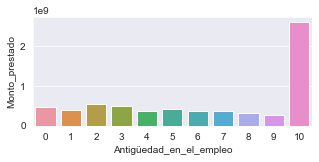



Respuesta= no hay una relacion lineal entre la antiguedad  y el monto prestado,  el gran salto es  a partir de los 10 años

### **Outliers**

Mediante el analisis  univariado  pudimos detectar outliers en la variable ingresos anuales, se considera como outliers aquellos ingresos mayores a 350.000  anuales,  lo cual da un tototal ede 1.312 prestamos , cuyos salarios anuales suman en total  749.997.054 


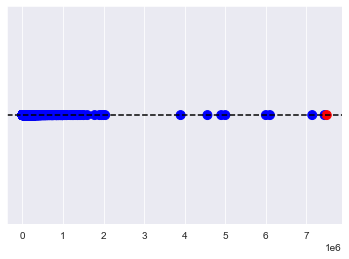


**Cual es la media entre los prestamos  otorgados sin verificar las garantias  contras los que si se verificaron?**

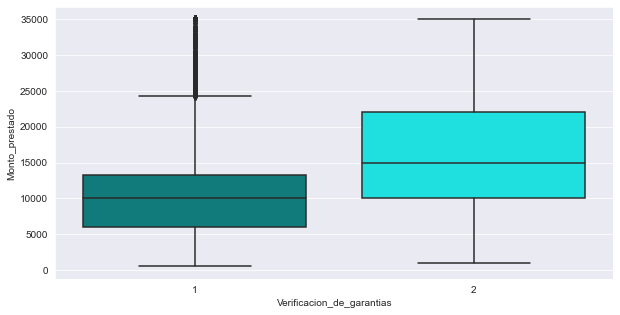

Respuesta=  la media es de 10.000 en los prestamos en los que no se verifico la garantia contra 15.000 de los que si se  verificaron, en ningun caso   pasan de los 35.000 otorgados

### **Analisis Bivariado**

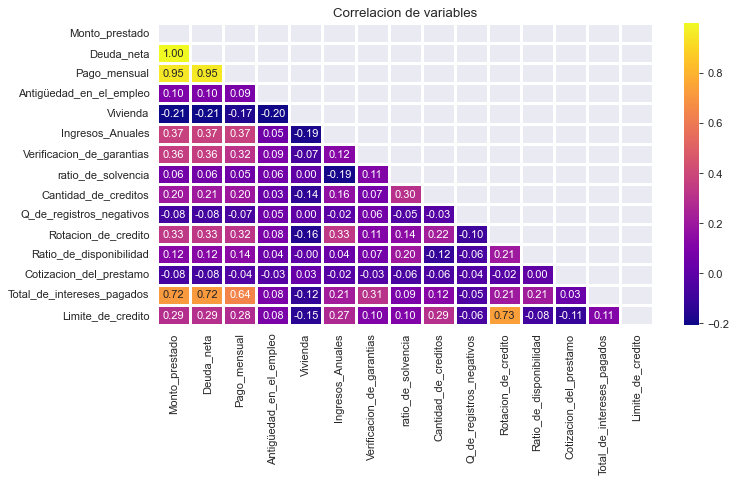

En el grafico de correlacion de variables, se puede percibir las siguientes correlaciones:

Alta correlacion
*   Monto_prestado/Deuda_neta
*   Monto_prestado/Pago_mensual
*   Deuda_neta/Pago_mensual

Correlacion media


*   Monto_prestado/Total_de_intereses_pagados
*   Deuda_neta/Total_de_intereses_pagados
*   Pago_mensual/Total_de_intereses_pagados
*   Rotacion_del_credito/Limite_de_credito

Correlacion Normal

Un total de 27 correlaciones en el rango de 0.20 y 0.40









### **Seleccion de modelo**

 A continuación vamos a determinar cuáles son los modelos mas apropiados para nustro data set

Nuestro modelo de machine learning corresponde a un supervisado  de clasificacion, hemos probado la exactitud con 4 modelos: Random Forest, KNN, red Neuronal y regresion logistica. Para evaluar la diferentes posibilidades, se añadieron a los modelos, la inserción de parámetros mediante del grid search y el random search mediante la técnica de repeated stratified k fold, a continuación se muestra la comparativa de los modelos:



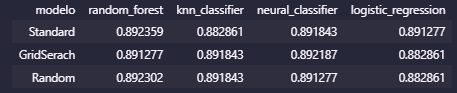


Conclusion= el meojor accuary nos lo da  Random forest con los parametros Standard

La matriz de confusion de Random Forest es la siguiente

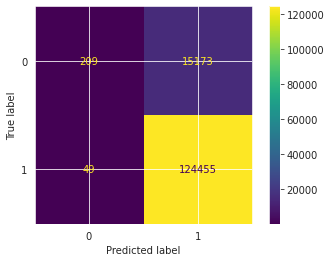

La curva Roc es la siguiente

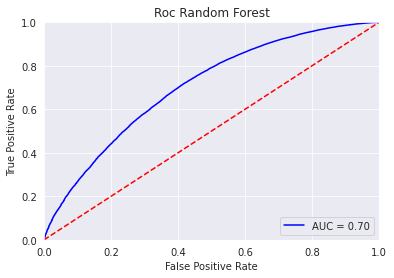


En relacion  a los modelos de ensamble se realiza una comparativa 
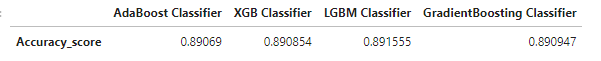


Finalmente, se procede a evaluar el modelo con mejor puntuación con shap Shapley Additive Explanations, se procederá a mostrar los valores obtenidos:

Bar plot

A continuación se encuentran las características ordenadas de mayor a menor en la predicción, no afecta la predicción de forma positiva o negativa, por lo tanto, se evidencia una mayor imporancia de total de intereses pagados

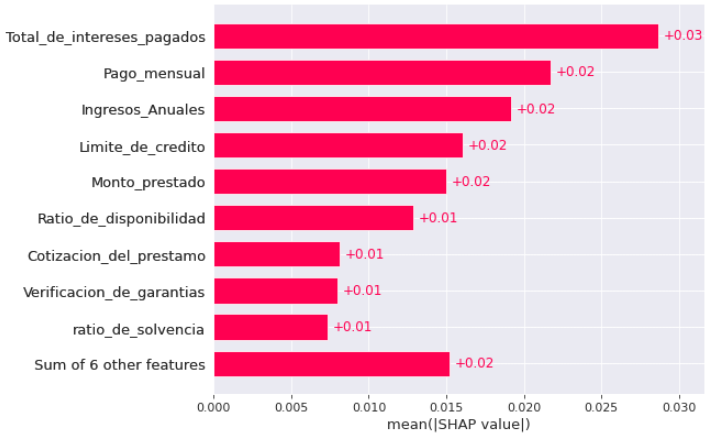

Beeswarm
En Beeswarm, las funciones también están ordenadas por su efecto en la predicción, pero también podemos ver cómo los valores más altos y más bajos de la función afectarán el resultado.

Heatmap
Pasar una matriz de valores SHAP a la función de gráfico de mapa de calor crea un gráfico con las instancias en el eje x, las entradas del modelo en el eje y y los valores SHAP codificados en una escala de colores. De forma predeterminada, las muestras se ordenan mediante shap.order.hclust, que ordena las muestras en función de una agrupación jerárquica por similitud de explicación. Esto da como resultado que las muestras que tienen el mismo resultado del modelo por la misma razón se agrupen.

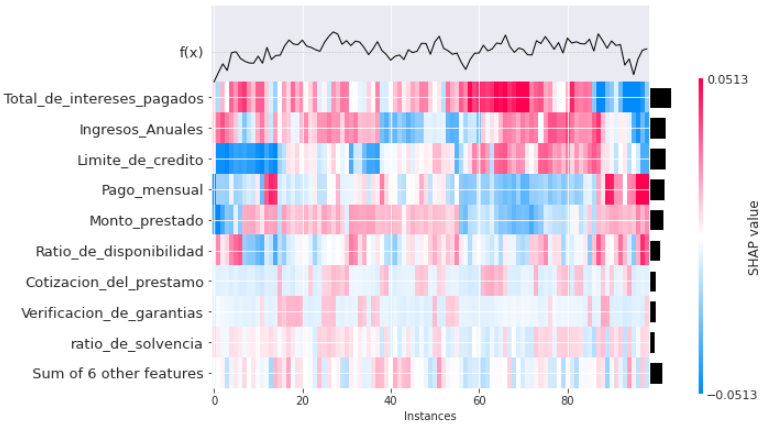

Waterfall Plot
El diagrama de cascada tiene la misma información, representada de manera diferente. Aquí podemos ver como la suma de todos los valores SHAP es igual a la diferencia entre la predicción  f(x)  y el valor esperado  E[f(x)] .

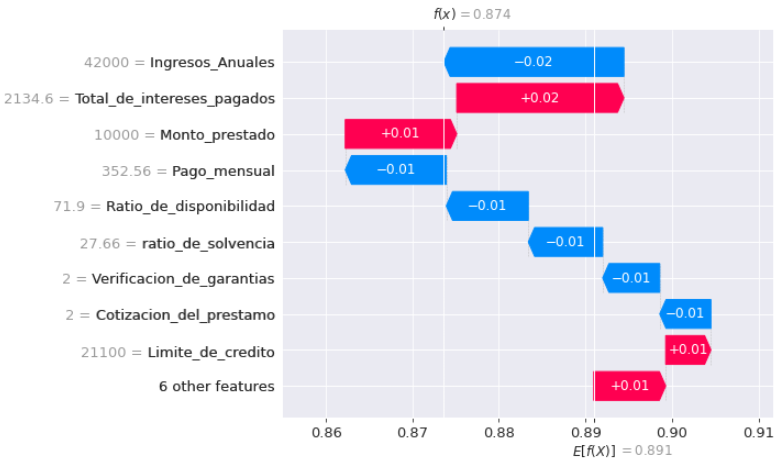

Force Plot
La gráfica de fuerza es otra forma de ver el efecto que tiene cada característica en la predicción, para una observación dada. En este gráfico, los valores SHAP positivos se muestran en el lado izquierdo y los negativos en el lado derecho, como si compitieran entre sí. El valor resaltado es la predicción para esa observación.

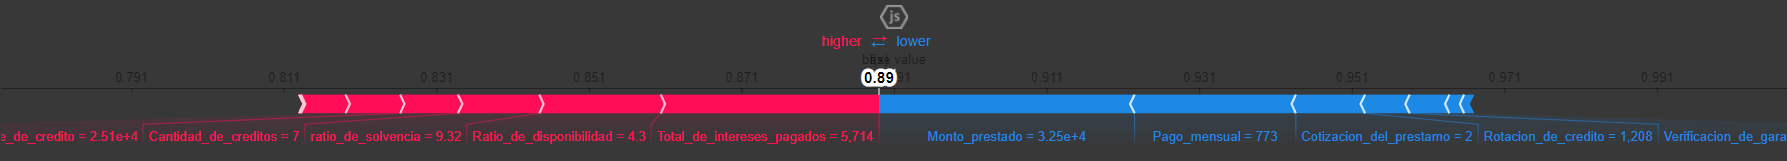

Decision Plot
Los diagramas de decisión admiten valores de interacción SHAP: las interacciones de primer orden estimadas a partir de modelos basados ​​en árboles. Si bien los gráficos de dependencia SHAP son la mejor forma de visualizar las interacciones individuales, un gráfico de decisión puede mostrar el efecto acumulativo de los efectos principales y las interacciones para una o más observaciones.

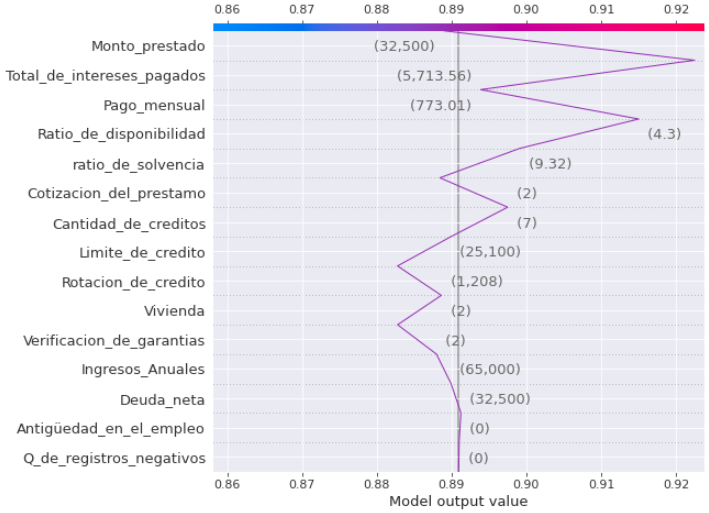

violin plot
